In [2]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

from envs.moving_average_env import MovingAverageEnv
from envs.rsi_env import RsiEnv
from envs.macd_env import MacdEnv
from utils import load_dataset

from tf_agents.environments import tf_py_environment
from tf_agents.policies import random_tf_policy
import matplotlib.pyplot as plt

In [3]:
df = load_dataset('./resources/BABA.csv')
#env = MovingAverageEnv(df=df, window_size=10, frame_bound=(2000, 2300))
#env = RsiEnv(df=df, window_size=10, frame_bound=(2000, 2300))
env = MacdEnv(df=df, window_size=10, frame_bound=(2300, 2320))

In [4]:
df.iloc[0:5]

,Close,Volume,Open,High,Low
0,93.89,271718000,92.70,99.70,89.95
1,89.89,66495310,92.70,92.95,89.50
2,87.17,38935050,88.94,90.48,86.62
3,90.57,31966400,88.47,90.57,87.22
4,88.92,28566180,91.09,91.50,88.50


In [5]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(30,), dtype=dtype('float32'), name='observation', minimum=[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.], maximum=[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5.])})

In [6]:
env.prices.size

30

In [7]:
env.signal_features

array([[-1.1358842 ,  0.85024387, -0.89444685],
       [-1.0020343 ,  1.0056112 , -0.9159643 ],
       [-0.8420585 ,  1.1508058 , -0.9011832 ],
       [-0.66242874,  1.2826847 , -0.8534323 ],
       [-0.5621827 ,  1.3246808 , -0.79518235],
       [-0.47084287,  1.3511528 , -0.73031443],
       [-0.28773066,  1.4457482 , -0.6417977 ],
       [ 0.06297123,  1.6554962 , -0.50084394],
       [ 0.35450083,  1.775957  , -0.32977498],
       [ 0.5963481 ,  1.8325796 , -0.14455035],
       [ 0.72998697,  1.791311  ,  0.03035711],
       [ 0.63015765,  1.5715215 ,  0.15031722],
       [ 0.5592193 ,  1.4188029 ,  0.23209764],
       [ 0.46031728,  1.2742568 ,  0.27774158],
       [ 0.55231136,  1.311337  ,  0.33265552],
       [ 0.9530901 ,  1.5880288 ,  0.45674244],
       [ 0.46630964,  1.0993348 ,  0.4586559 ],
       [-0.06015087,  0.67663574,  0.35489452],
       [-0.37280646,  0.50952035,  0.20935433],
       [-0.5526917 ,  0.4820443 ,  0.05694512],
       [-0.6728722 ,  0.5078273 , -0.089

In [8]:
eval_env = tf_py_environment.TFPyEnvironment(env)

In [9]:
random_policy = random_tf_policy.RandomTFPolicy(eval_env.time_step_spec(),
                                                eval_env.action_spec())

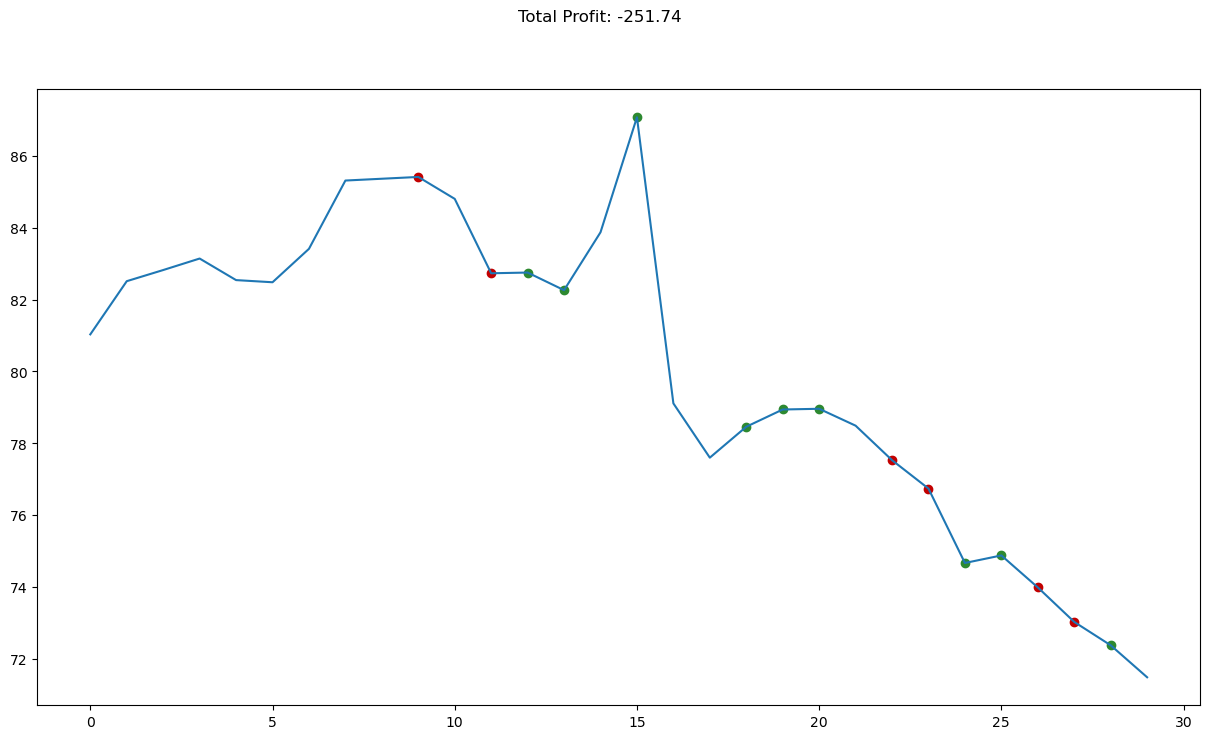

In [10]:
def render_policy_eval2(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        #print(time_step.observation)
    env.render('human')
    env.save_render('luqui_test')

def render_policy_eval(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
    plt.figure(figsize=(15, 8))
    env.save_render(filename)
    
render_policy_eval(random_policy, './evals/test_env.jpg')